#グラフ分割問題
グラフ問題において、頂点Vの数が偶数ある時に頂点をちょうどV/2ずつ２グループに分割した時に、お互いのグループをつなぐエッジの数が最小になる問題を求めます。

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_ja/img/009_1.png?raw=1">

１つ目のコスト関数はsi=−1とsi=1に分けた時にそれぞれのグループに含まれる頂点の数が同じになるような条件、２つ目は２つの頂点を選んだ時に違うグループに属する場合にはコストが上がるように設計された項です。これにより、違うグループ同士で接続数が多いとコストが増加するように設計されています。今回はQUBOの{0,1}ではなくイジングの{-1,1}で考えます。

##例題
1Dリングのグラフを想定しました。8ノードあります。


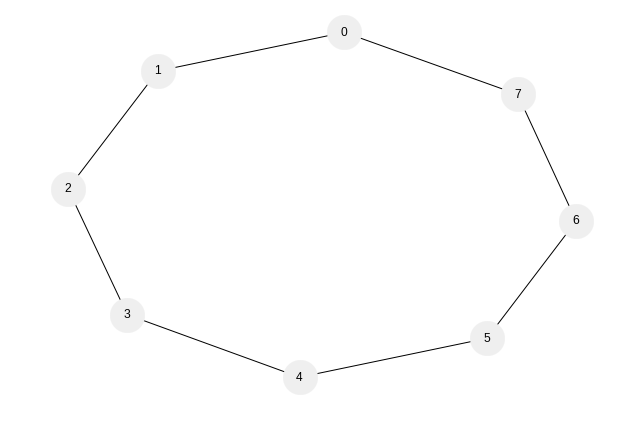

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7])
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,0)])
nx.draw(G, **options)

早速プログラムをしていきます。準備をして読み込みます。

In [0]:
!pip install -U wildqat

In [0]:
import wildqat as wq
a = wq.opt()

上記コスト関数の1項目は全ての量子ビットを足し合わせて二乗しています。
これはすべての量子ビットの局所磁場を1にして係数をとります。

In [3]:
matrix1 = wq.sqr([1,1,1,1,1,1,1,1])
print(matrix1)

[[1 2 2 2 2 2 2 2]
 [0 1 2 2 2 2 2 2]
 [0 0 1 2 2 2 2 2]
 [0 0 0 1 2 2 2 2]
 [0 0 0 0 1 2 2 2]
 [0 0 0 0 0 1 2 2]
 [0 0 0 0 0 0 1 2]
 [0 0 0 0 0 0 0 1]]


次に2項目は定数項は無視して、-B/2をすべてのJijに対してかけて足し合わせます。
B=0.5としてみます。
また、上記1Dリングの繋がっているのは隣り合う量子ビット同士が繋がっており、最後の量子ビットは最後の量子ビットと繋がっています。

Wildqatの機能でネットワーク構造からmatrixを作る機能を使ってみます。

In [4]:
matrix2 = wq.net([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,0]],8)
print(matrix2)

[[0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
B = 0.5
a.J = matrix1 - B * matrix2
a.sa()

1.6756653785705566


[0, 0, 0, 1, 1, 1, 1, 0]

In [6]:
a.sa()

1.685091495513916


[1, 1, 1, 0, 0, 0, 0, 1]

In [7]:
print(a.J)

[[1.  1.5 2.  2.  2.  2.  2.  1.5]
 [0.  1.  1.5 2.  2.  2.  2.  2. ]
 [0.  0.  1.  1.5 2.  2.  2.  2. ]
 [0.  0.  0.  1.  1.5 2.  2.  2. ]
 [0.  0.  0.  0.  1.  1.5 2.  2. ]
 [0.  0.  0.  0.  0.  1.  1.5 2. ]
 [0.  0.  0.  0.  0.  0.  1.  1.5]
 [0.  0.  0.  0.  0.  0.  0.  1. ]]


何度か試してみましたが、きちんと半分に分類されました。
以上です。